In [1]:
# Name Dipika Sharma
# DSC 540 T302 Data Preparation
# Week 5 and 6

# Week 5 and 6 Exercises

# Activity 7

Reading Tabular Data from a Web Page and Creating DataFrames
In this activity, you have been given a Wikipedia page where you have the GDP of all countries listed. You have been asked to create three DataFrames from the three sources mentioned in the page (https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)):


In [2]:
from bs4 import BeautifulSoup
import pandas as pd

1. Open the page in a separate Chrome/Firefox tab and use something like an Inspect Element tool to view the source HTML and understand its structure

2. Read the page using bs4

In [3]:
# Download the following HTML file, save it and then use bs4 to read it from the disk
fd = open("List of countries by GDP (nominal) - Wikipedia.htm", "r")
soup = BeautifulSoup(fd)
fd.close()
# print(soup.prettify())

3. Find the table structure you will need to deal with (how many tables there are?)

In [4]:
# findall method to extract the content

Tables_ = soup.find_all("table")
print("There are {} tables in a source".format(len(Tables_)))

There are 9 tables in a source


4. Find the right table using bs4

In [5]:
# going to the website, right click, choose inspect. You can find the class of the table which we can use to find the correct table.

tbl = soup.find("table", {"class": '"wikitable"|}'})
print(type(tbl))

<class 'bs4.element.Tag'>


5. Separate the source names and their corresponding data

In [7]:
# Extract all rows of the table body from the html page

Source = tbl.tbody.findAll('tr', recursive=False)[0]
Source_columns = [td for td in Source.findAll('td')]
print(len(Source_columns))

3


In [8]:
# using findall to extract data from HTML page
data = tbl.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False)

In [9]:
# creating empty list data_tables

data_tables = []
for td in data:
    data_tables.append(td.findAll('table'))

In [11]:
len(data_tables)

3

6. Get the source names from the list of sources you have created

In [14]:
# Getting source name from list Source_columns

source_name = [source.findAll('a')[0].getText() for source in Source_columns]
print(source_name)

['International Monetary Fund', 'World Bank', 'United Nations']


7. Separate the header and data from the data that you separated before for the first source only, and then create a DataFrame using that

In [15]:
# Getting header for the first source usig the findall

Header_1 = [th.getText().strip() for th in data_tables[0][0].findAll('thead')[0].findAll('th')]
Header_1

['Rank', 'Country', 'GDP(US$MM)']

In [16]:
# Extracting data from data_tables list that we created before.

Data_1 = data_tables[0][0].findAll('tbody')[0].findAll('tr')[1:]

In [17]:
# Getting the rows text from first source data.

Data_rows_1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in Data_1]

In [19]:
# creating dataframe using rows and headers extract from source first.

source_df_1 = pd.DataFrame(Data_rows_1, columns=Header_1)

In [20]:
source_df_1.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,600"
1,2,China[n 1],"12,014,610"
2,3,Japan,"4,872,135"
3,4,Germany,"3,684,816"
4,5,United Kingdom,"2,624,529"


8. Repeat the last task for the other two data sources

In [21]:
# doing the same steps for second source.
# Extracting headers name from data tables

Header_2 = [th.getText().strip() for th in data_tables[1][0].findAll('thead')[0].findAll('th')]
Header_2

['Rank', 'Country', 'GDP(US$MM)']

In [24]:
# Extracting data from data_tables list that we created before.

Data_2 = data_tables[1][0].findAll('tbody')[0].findAll('tr')[1:]

In [25]:
# Declaring the defintion of fundtion to strip text

def find_right_text(i, td):
    if i == 0:
        return td.getText().strip()
    elif i == 1:
        return td.getText().strip()
    else:
        index = td.text.find("♠")
        return td.text[index+1:].strip()

In [31]:
# Getting the rows text from first source data.

Data_rows_2 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in Data_2]

In [32]:
# creating dataframe using rows and headers extract from source first.

source_df_2 = pd.DataFrame(Data_rows_2, columns=Header_2)

In [33]:
source_df_2.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


In [34]:
# Now we repeat the steps for 3rd data source
Header_3 = [th.getText().strip() for th in data_tables[2][0].findAll('thead')[0].findAll('th')]
Header_3

['Rank', 'Country', 'GDP(US$MM)']

In [35]:
Data_3 = data_tables[2][0].findAll('tbody')[0].findAll('tr')[1:]

In [36]:
Data_rows_3 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in Data_3]

In [38]:
# Creating the 3rd dataframe.

source_df_3 = pd.DataFrame(Data_rows_3, columns=Header_3)
source_df_3.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"18,624,475"
1,2,China[n 4],"11,218,281"
2,3,Japan,"4,936,211"
3,4,Germany,"3,477,796"
4,5,United Kingdom,"2,647,898"


# Activity 8

Handling Outliers and Missing Data
In this activity, we will identify and get rid of outliers. Here, we have a CSV file. The goal here is to clean the data by using the knowledge that we have learned about so far and come up with a nicely formatted DataFrame. Identify the type of outliers and their effect on the data and clean the messy data.

The steps that will help you solve this activity are as follows:

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

1. Read the visit_data.csv file.

In [42]:
# reading the csv file.

Visit_df = pd.read_csv("visit_data.csv")

In [43]:
# Using head to show the first five rows of the csv file.
Visit_df.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


2. Check for duplicates.

In [48]:
# Lets analyse the data for outliers.
# lets pick some columns to check for duplicate, we can use dupilcated function.

# Since column ID is seems to be a primary key of the table, so lets check it first for duplicate values.

print("Is column ID is duplicated? - {}".format(any(Visit_df.id.duplicated())))

# Lets pick few more columns to check for duplicate data

print("Is column first_name is duplicated? - {}".format(any(Visit_df.first_name.duplicated())))
print("Is column last_name is duplicated? - {}".format(any(Visit_df.last_name.duplicated())))
print("Is column email is duplicated? - {}".format(any(Visit_df.email.duplicated())))

Is column ID is duplicated? - False
Is column first_name is duplicated? - True
Is column last_name is duplicated? - True
Is column email is duplicated? - False


3. Check if any essential column contains NaN.

In [49]:
# Now lets look for NaN values in csv file.

print("Is the column gender contains NaN values? - %r " % Visit_df.gender.isnull().values.any())

print("Is the column ip_address contains NaN values?- %r " % Visit_df.ip_address.isnull().values.any())
print("Is the column visit contains NaN values? - %s " % Visit_df.visit.isnull().values.any())
print("Is the column email contains NaN values? - %s " % Visit_df.email.isnull().values.any())

Is the column gender contains NaN values? - True 
Is the column ip_address contains NaN values?- False 
Is the column visit contains NaN values? - True 
Is the column email contains NaN values? - False 


The column gender and visit has NaN values but the other columns like ip_address and email do not have NaN values in the dataset.
Since the database is all about he visit, so we need to analyse data for visit columns which has NaN values. We can treat them as outliers of the dataset.
We can either remove them or can assign mean of visit column value to it.

4. Get rid of the outliers.

In [50]:
# Lets remove the outliers from the dataset
# Lets use the np.isfinite, this function will help us in identify if the variable is not infinity or not Not a Number. In our case it will help s in identify the NaN values.

# Lets save the size of the dataset before making any changes.

old_df_size = Visit_df.shape
Visit_df = Visit_df[np.isfinite(Visit_df['visit'])] 
new_df_size = Visit_df.shape

5. Report the size difference.

In [53]:

print("Size of the visit dataset before removing the NaN values from column visit is {old[0]} rows and the size of the dataset after making changes is {new[0]} rows.".
      format(old=old_df_size, new=new_df_size))
# As we can see the old dataset size is 1000 and new dataset size is 974 rows.

Size of the visit dataset before removing the NaN values from column visit is 1000 rows and the size of the dataset after making changes is 974 rows.


6. Create a box plot to check for outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb4511dfd30>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb4511f83d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb4511df8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb4511f8af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb4511f8e80>],
 'means': []}

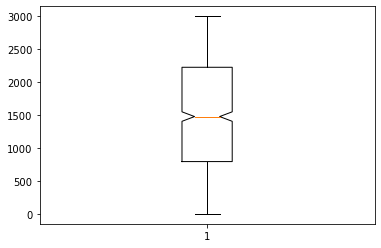

In [55]:
plt.boxplot(Visit_df.visit, notch=True)

We can clearly see from above boxplot that the during interval 0 to 3000 the main concentration of the data is found in between 750 to 2250. i think it would be save to say that anything below 200 and above 2800 will be outliers for us. And we can remove it from dataset.


In [56]:
# Creating new dataframe by removing the outliers from existing dataset.

Visit_df_new = Visit_df[(Visit_df['visit'] <= 2800) & (Visit_df['visit'] >= 200)] 

In [57]:
# Lets see what the current size of the dataset after removing ouliers from data.

print("The size of the dataset after removing outliers - {}".format(*Visit_df_new.shape))

The size of the dataset after removing outliers - 864


# Exercise 3

Insert data into a SQL Lite database – create a table with the following data (Hint: Python for Data Analysis page 191):


a. Name, Address, City, State, Zip, Phone Number


b. Add at least 10 rows of data and submit your code with a query generating your results.

In [60]:
import sqlite3

#Connecting to sqlite
conn = sqlite3.connect('example.db')

In [61]:
#Creating a cursor object using the cursor() method
cursor = conn.cursor()

In [62]:
# Create table with given columns
cursor.execute('''CREATE TABLE USER_Info_
               (ID integer primary key autoincrement, NAME text, ADDRESS text, CITY text, STATE text, ZIP text, [PHONE NUMBER] Intezer)''')

In [63]:
# Preparing SQL queries to INSERT a record into the database.
cursor.execute('''INSERT INTO USER_Info_(
   NAME , ADDRESS , CITY , STATE , ZIP , [PHONE NUMBER]) VALUES 
   ('Katrina', 'Rhode Island', 'Woonsocket', 'RI', '02895', 4017897832)''')

cursor.execute('''INSERT INTO USER_Info_(
   NAME , ADDRESS , CITY , STATE , ZIP , [PHONE NUMBER]) VALUES 
   ('Angel', 'Texas', 'Texas City', 'TX', '77590', 4017897831)''')

cursor.execute('''INSERT INTO USER_Info_(
   NAME , ADDRESS , CITY , STATE , ZIP , [PHONE NUMBER]) VALUES 
   ('Kathy', 'Rhode Island', 'Woonsocket', 'RI', '02895', 4017897833)''')

cursor.execute('''INSERT INTO USER_Info_(
   NAME , ADDRESS , CITY , STATE , ZIP , [PHONE NUMBER]) VALUES 
   ('Maya', 'Massachussets', 'Seekonk', 'MA', '02771', 4017897834)''')

cursor.execute('''INSERT INTO USER_Info_(
   NAME , ADDRESS , CITY , STATE , ZIP , [PHONE NUMBER]) VALUES 
   ('Ryan', 'Rhode Island', 'Woonsocket', 'RI', '02895', 4017897835)''')

cursor.execute('''INSERT INTO USER_Info_(
   NAME , ADDRESS , CITY , STATE , ZIP , [PHONE NUMBER]) VALUES 
   ('Jason', 'Rhode Island', 'Barrignton', 'RI', '02951', 4017897836)''')

cursor.execute('''INSERT INTO USER_Info_(
   NAME , ADDRESS , CITY , STATE , ZIP , [PHONE NUMBER]) VALUES 
   ('Jimmy', 'Massachussets', 'Seekonk', 'MA', '02771', 4017897837)''')

cursor.execute('''INSERT INTO USER_Info_(
   NAME , ADDRESS , CITY , STATE , ZIP , [PHONE NUMBER]) VALUES 
   ('Eric', 'Rhode Island', 'Providence', 'RI', '02904', 4017897838)''')

cursor.execute('''INSERT INTO USER_Info_(
   NAME , ADDRESS , CITY , STATE , ZIP , [PHONE NUMBER]) VALUES 
   ('Oren', 'Texas', 'Texas City', 'TX', '77590', 4017897839)''')

cursor.execute('''INSERT INTO USER_Info_(
   NAME , ADDRESS , CITY , STATE , ZIP , [PHONE NUMBER]) VALUES 
   ('Chris', 'Rhode Island', 'Woonsocket', 'RI', '02895', 4017897840)''')

In [64]:
# Commit your changes in the database
conn.commit()
print("Records inserted........")

Records inserted........


In [66]:
# Printing rows.
for row in cursor.execute('SELECT * FROM USER_Info_'):
        print(row)

(1, 'Katrina', 'Rhode Island', 'Woonsocket', 'RI', '02895', 4017897832)
(2, 'Angel', 'Texas', 'Texas City', 'TX', '77590', 4017897831)
(3, 'Kathy', 'Rhode Island', 'Woonsocket', 'RI', '02895', 4017897833)
(4, 'Maya', 'Massachussets', 'Seekonk', 'MA', '02771', 4017897834)
(5, 'Ryan', 'Rhode Island', 'Woonsocket', 'RI', '02895', 4017897835)
(6, 'Jason', 'Rhode Island', 'Barrignton', 'RI', '02951', 4017897836)
(7, 'Jimmy', 'Massachussets', 'Seekonk', 'MA', '02771', 4017897837)
(8, 'Eric', 'Rhode Island', 'Providence', 'RI', '02904', 4017897838)
(9, 'Oren', 'Texas', 'Texas City', 'TX', '77590', 4017897839)
(10, 'Chris', 'Rhode Island', 'Woonsocket', 'RI', '02895', 4017897840)
